In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("D:/Data Science/Project files/2nd project/drugsCom_raw.tsv", sep = '\t')

In [7]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [8]:
data_n= data[data['condition'].isin(['High Blood Pressure', 'Depression','Diabetes, Type 2'])]
data_n

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [9]:
data1 = data_n.drop(['Unnamed: 0'], axis =1)
data1

,drugName,condition,review,rating,date,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...
161251,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [10]:
data2 = data1.drop(['date'], axis = 1)
data3 = data2.reset_index()
data3 = data3.drop(["index"], axis=1)

In [11]:
data3.isnull().sum()

drugName       0
condition      0
review         0
rating         0
usefulCount    0
dtype: int64

In [12]:
data3[data3.duplicated()].shape

(0, 5)

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drugName     13944 non-null  object 
 1   condition    13944 non-null  object 
 2   review       13944 non-null  object 
 3   rating       13944 non-null  float64
 4   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 544.8+ KB


In [14]:
data3.describe()

,rating,usefulCount
count,13944.000000,13944.000000
mean,6.862952,45.737880
std,3.207061,51.782627
min,1.000000,0.000000
25%,4.000000,16.000000
50%,8.000000,31.000000
75%,10.000000,59.000000
max,10.000000,1291.000000


# VISUALIZATION

## Drug Names Visualization

In [15]:
# Word cloud for most popular drugs
from wordcloud import WordCloud
from wordcloud import STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
data3['drugName'].nunique()

334

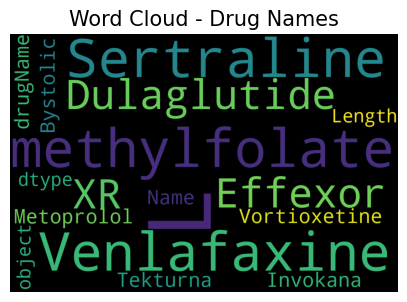

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data3['drugName']))

plt.rcParams['figure.figsize'] = (5,14)
plt.title('Word Cloud - Drug Names', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

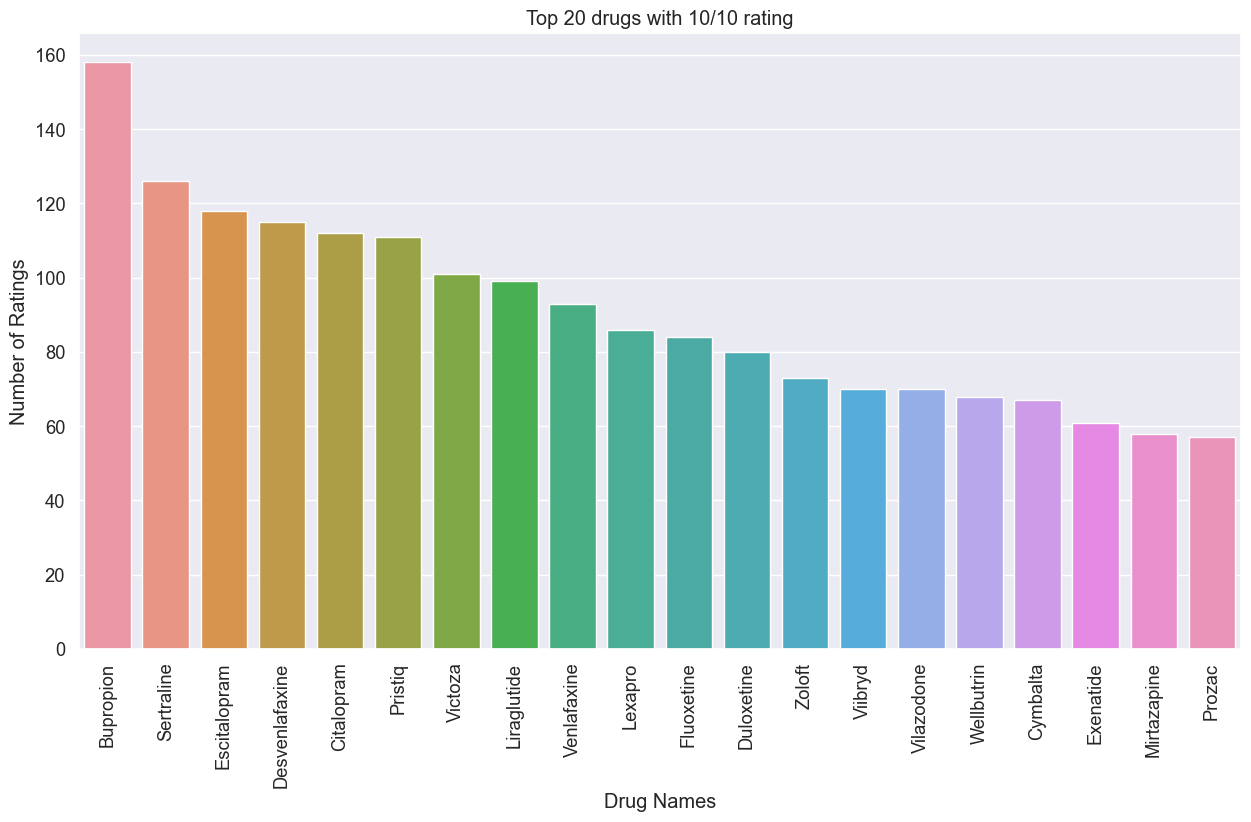

In [ ]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data3.loc[data3.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

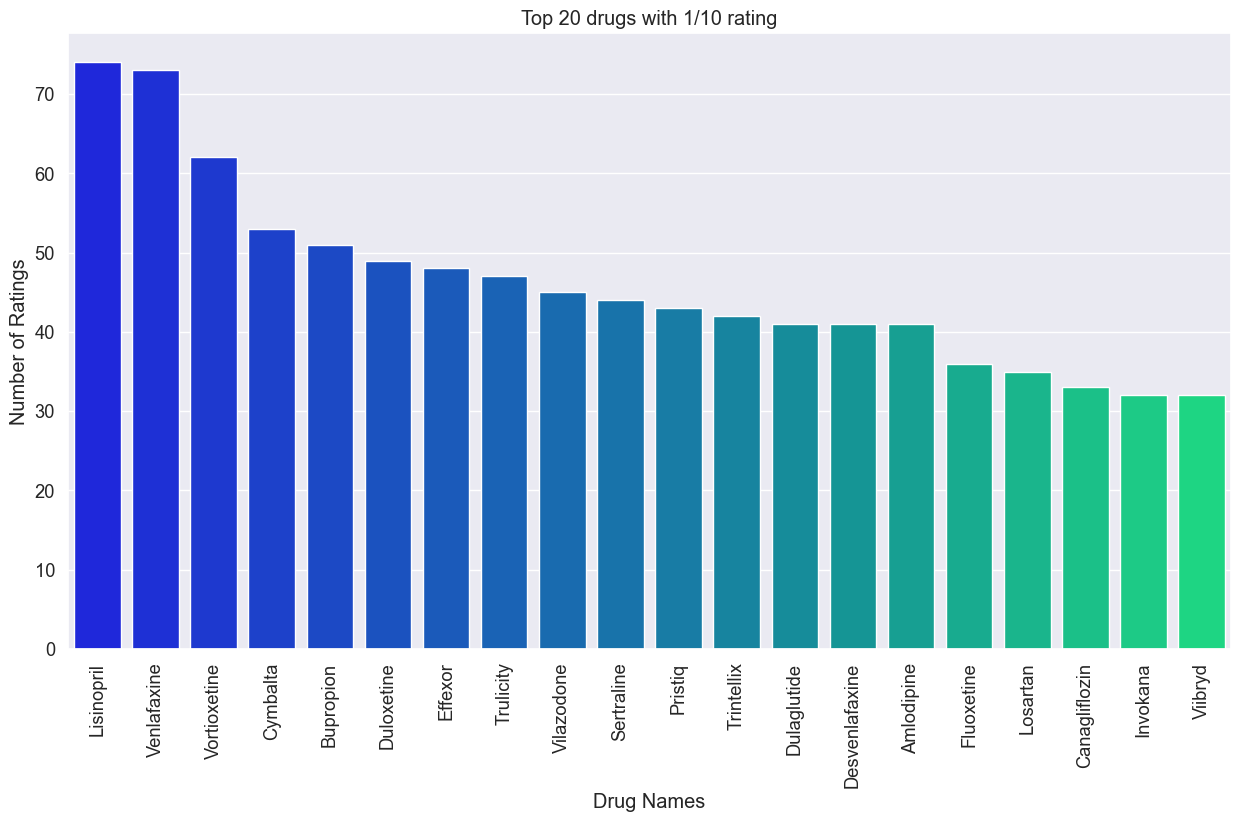

In [ ]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data3.loc[data3.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

## Rating Visualization

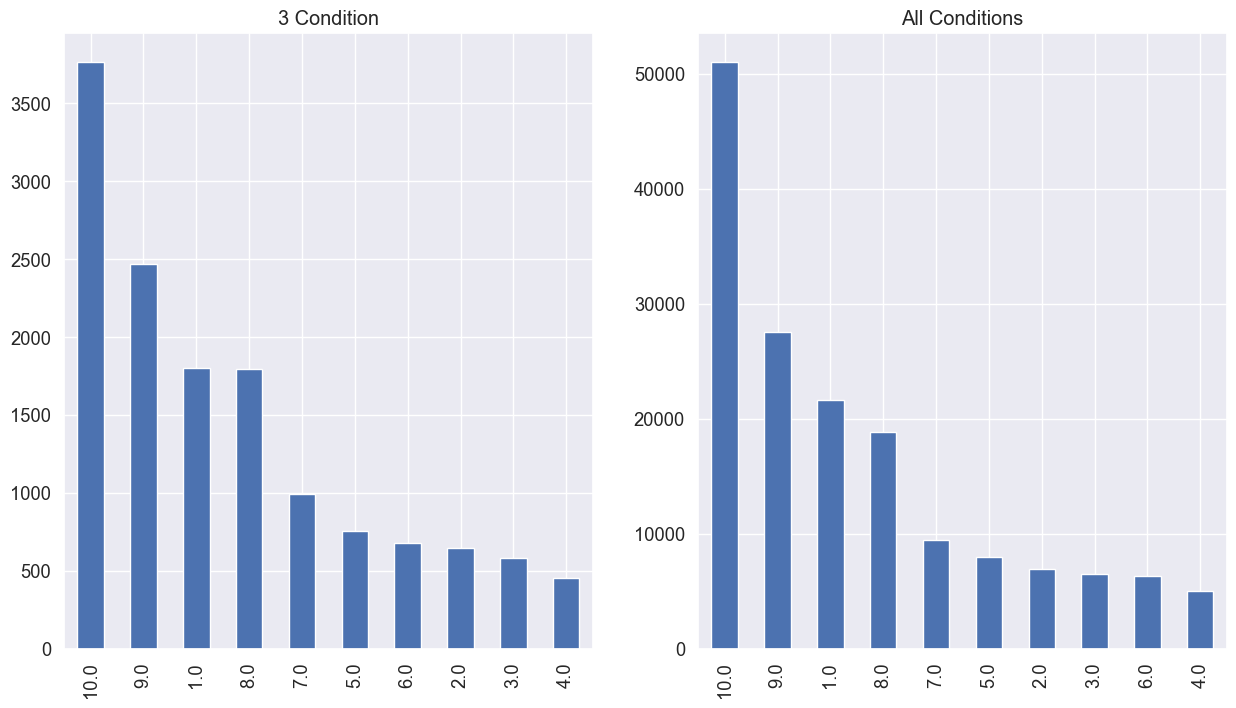

In [ ]:
plt.subplot(1, 2, 1)
plt.title("3 Condition")
data3['rating'].value_counts().plot.bar()

plt.subplot(1, 2, 2)
plt.title("All Conditions")
data['rating'].value_counts().plot.bar()
plt.show()

In [ ]:
data3['rating'].value_counts()

10.0    3763
9.0     2468
1.0     1802
8.0     1795
7.0      995
5.0      756
6.0      680
2.0      645
3.0      582
4.0      458
Name: rating, dtype: int64

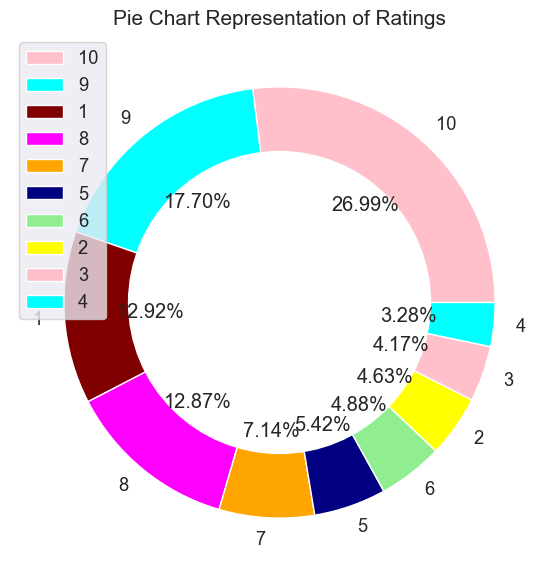

In [ ]:
# making a donut chart to represent share of each ratings

size = [3763,2468,1802,1795,995,756,680,645,582,458]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "9", "1", "8", "7", "5", "6", "2", "3","4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 15)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

## Reviews Visualization

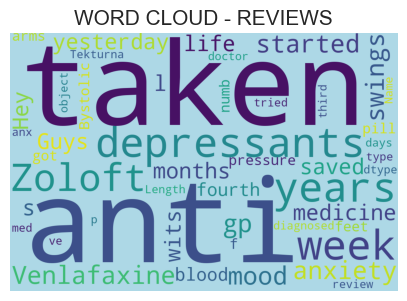

In [ ]:
# let's see the words cloud for the reviews 

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data3['review']))

plt.rcParams['figure.figsize'] = (5, 5)
plt.title('WORD CLOUD - REVIEWS', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Sentiments 

In [ ]:
data3.loc[(data3['rating'] >= 7), 'Review_Sentiment'] = 1
data3.loc[(data3['rating'] < 7), 'Review_Sentiment'] = 0

data3['Review_Sentiment'].value_counts()

1.0    9021
0.0    4923
Name: Review_Sentiment, dtype: int64

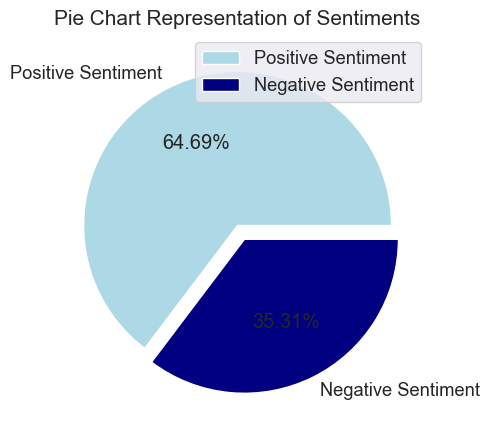

In [ ]:
size = [9021, 4923]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 15)
plt.legend()
plt.show()

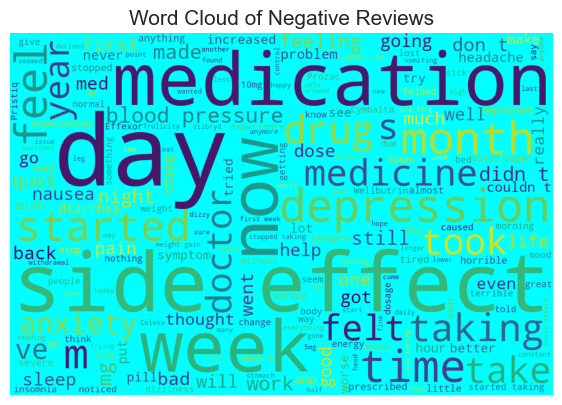

In [ ]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data3['review'][data3['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (7, 7)
plt.title('Word Cloud of Negative Reviews', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# Function For Cleaning the text

def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [ ]:
import warnings
warnings.filterwarnings("ignore")
data3['review_clean'] = review_clean(data3['review'])

In [ ]:
import re
def remove_number_tag(text):
        return re.sub('[0-9]+', '',text)

In [ ]:
data3['review_clean'] = data3['review_clean'].apply(remove_number_tag)

In [ ]:
data3

,drugName,condition,review,rating,usefulCount,Review_Sentiment,review_clean
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1.0,i have taken anti depressants for years with s...
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1.0,week on zoloft for anxiety and mood swings i ...
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,0.0,my gp started me on venlafaxine yesterday to h...
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1.0,hey guys its been months since my last post a...
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1.0,this medicine saved my life i was at my wits e...
...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,0.0,it is fourth blood pressure pill for me it fee...
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,0.0,while on bystolic my feet and arms were numb m...
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,1.0,i just got diagnosed with type my doctor pres...
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,0.0,this is the third med ive tried for anxiety an...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase = True, stop_words = "english" )
reviews = tfidf.fit_transform(data3['review_clean'])

In [ ]:
from textblob import TextBlob
data3['polarity'] = data3["review_clean"].apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
data3.head()

,drugName,condition,review,rating,usefulCount,Review_Sentiment,review_clean,polarity
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1.0,i have taken anti depressants for years with s...,0.275000
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1.0,week on zoloft for anxiety and mood swings i ...,-0.055556
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,0.0,my gp started me on venlafaxine yesterday to h...,-0.087546
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1.0,hey guys its been months since my last post a...,0.103571
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1.0,this medicine saved my life i was at my wits e...,0.168194


In [ ]:
def sent_type(Review): 
    
        if Review>0.2:
               return 'positive'
        else:
               return 'negative'
    
data3['emotion']= data3['polarity'].apply(sent_type) 

In [ ]:
data3["emotion"].value_counts()

negative    10922
positive     3022
Name: emotion, dtype: int64

In [ ]:
data3.head()

,drugName,condition,review,rating,usefulCount,Review_Sentiment,review_clean,polarity,emotion
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1.0,i have taken anti depressants for years with s...,0.275000,positive
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1.0,week on zoloft for anxiety and mood swings i ...,-0.055556,negative
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,0.0,my gp started me on venlafaxine yesterday to h...,-0.087546,negative
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1.0,hey guys its been months since my last post a...,0.103571,negative
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1.0,this medicine saved my life i was at my wits e...,0.168194,negative


# Model Building

In [ ]:
x = reviews
y = data3["condition"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(multi_class = "ovr")

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
# Evaluation
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

         Depression       0.93      0.99      0.96      2257
   Diabetes, Type 2       0.98      0.91      0.94       627
High Blood Pressure       0.97      0.80      0.88       602

           accuracy                           0.95      3486
          macro avg       0.96      0.90      0.93      3486
       weighted avg       0.95      0.95      0.94      3486



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2 = RandomForestClassifier()

In [ ]:
model2.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = model2.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred2))

                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.97      2257
   Diabetes, Type 2       0.99      0.92      0.96       627
High Blood Pressure       0.97      0.83      0.90       602

           accuracy                           0.95      3486
          macro avg       0.97      0.92      0.94      3486
       weighted avg       0.95      0.95      0.95      3486



### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model3 = SVC()
model3.fit(x_train,y_train)

SVC()

In [ ]:
y_pred3 = model3.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred3))

                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      2257
   Diabetes, Type 2       0.98      0.94      0.96       627
High Blood Pressure       0.97      0.85      0.91       602

           accuracy                           0.96      3486
          macro avg       0.97      0.93      0.95      3486
       weighted avg       0.96      0.96      0.96      3486



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = model4.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred4))

                     precision    recall  f1-score   support

         Depression       0.95      0.96      0.95      2257
   Diabetes, Type 2       0.94      0.91      0.92       627
High Blood Pressure       0.87      0.84      0.85       602

           accuracy                           0.93      3486
          macro avg       0.92      0.90      0.91      3486
       weighted avg       0.93      0.93      0.93      3486



## Best Model - SVM

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
x_train_pred = model.predict(x_train)

In [ ]:
print("Accracy Score on training dataset is " , round(accuracy_score(y_train,x_train_pred),3))
print("Accracy Score on testing dataset is ", round(accuracy_score(y_test,y_pred3),3))

Accracy Score on training dataset is  0.963
Accracy Score on testing dataset is  0.959


In [ ]:
print(classification_report(y_test,y_pred3))

                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      2257
   Diabetes, Type 2       0.98      0.94      0.96       627
High Blood Pressure       0.97      0.85      0.91       602

           accuracy                           0.96      3486
          macro avg       0.97      0.93      0.95      3486
       weighted avg       0.96      0.96      0.96      3486

